In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

In [4]:
df = pd.read_csv('Supplement_Sales_Weekly_Expanded.csv')
df.head()

Date  Product Name     Category  Units Sold  Price  Revenue  \
0  2020-01-06  Whey Protein      Protein         143  31.98  4573.14   
1  2020-01-06     Vitamin C      Vitamin         139  42.51  5908.89   
2  2020-01-06      Fish Oil        Omega         161  12.91  2078.51   
3  2020-01-06  Multivitamin      Vitamin         140  16.07  2249.80   
4  2020-01-06   Pre-Workout  Performance         157  35.47  5568.79   

   Discount  Units Returned Location Platform  
0      0.03               2   Canada  Walmart  
1      0.04               0       UK   Amazon  
2      0.25               0   Canada   Amazon  
3      0.08               0   Canada  Walmart  
4      0.25               3   Canada    iHerb

In [116]:
df.shape

(4384, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [12]:
df['Effective_Price'] = df['Price'] * (1 - df['Discount'])
df['Profit'] = df['Revenue'] - (df['Discount'] * df['Units Sold'])
df['Return_Rate'] = df['Units Returned'] / df['Units Sold']

In [16]:
df.isnull().sum()

Date               0
Product Name       0
Category           0
Units Sold         0
Price              0
Revenue            0
Discount           0
Units Returned     0
Location           0
Platform           0
Week               0
Month              0
year               0
Effective_Price    0
Profit             0
Return_Rate        0
dtype: int64

In [18]:
df.describe()

Date   Units Sold        Price       Revenue  \
count                 4384  4384.000000  4384.000000   4384.000000   
mean   2022-08-18 12:00:00   150.200274    34.781229   5226.569446   
min    2020-01-06 00:00:00   103.000000    10.000000   1284.000000   
25%    2021-04-26 00:00:00   142.000000    22.597500   3349.372500   
50%    2022-08-18 12:00:00   150.000000    34.720000   5173.140000   
75%    2023-12-11 00:00:00   158.000000    46.712500   7009.960000   
max    2025-03-31 00:00:00   194.000000    59.970000  10761.850000   
std                    NaN    12.396099    14.198309   2192.491946   

          Discount  Units Returned       Week        Month         year  \
count  4384.000000     4384.000000     4384.0  4384.000000  4384.000000   
mean      0.124398        1.531478  25.718978     6.284672  2022.149635   
min       0.000000        0.000000        1.0     1.000000  2020.000000   
25%       0.060000        1.000000       12.0     3.000000  2021.000000   
50%       0.120000        1.000000       25.0     6.000000  2022.000000   
75%       0.190000        2.000000       39.0     9.000000  2023.000000   
max       0.250000        8.000000       53.0    12.000000  2025.000000   
std       0.071792        1.258479  15.252845     3.495858     1.522351   

       Effective_Price        Profit  Return_Rate  
count      4384.000000   4384.000000  4384.000000  
mean         30.463354   5207.894145     0.010186  
min           7.700000   1267.200000     0.000000  
25%          19.711350   3332.805000     0.006024  
50%          30.357100   5153.475000     0.007299  
75%          40.750725   6992.780000     0.014286  
max          59.910000  10737.540000     0.053333  
std          12.750531   2192.357619     0.008337

In [20]:
df.describe(include= object)

Product Name Category Location Platform
count           4384     4384     4384     4384
unique            16       10        3        3
top     Whey Protein  Vitamin   Canada    iHerb
freq             274      822     1507     1499

In [22]:
df.nunique()

Date                274
Product Name         16
Category             10
Units Sold           81
Price              2919
Revenue            4326
Discount             26
Units Returned        9
Location              3
Platform              3
Week                 53
Month                12
year                  6
Effective_Price    4286
Profit             4344
Return_Rate         314
dtype: int64

In [110]:
num_cols = ['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned']

In [ ]:
plt.figure(figsize=(12,6))
df[num_cols].boxplot()
plt.title("Boxplots Before Outlier Removal")
plt.show()

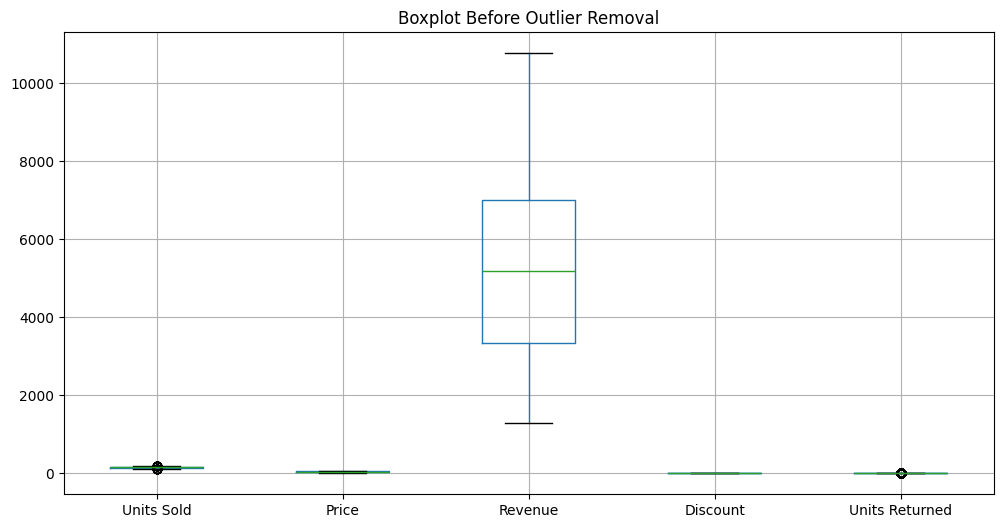

In [114]:
plt.figure(figsize=(12,6))
df[num_cols].boxplot()
plt.title('Boxplot Before Outlier Removal')
plt.show()

In [24]:
daily_sales = df.groupby('Date').agg({
    'Revenue':'sum',
    'Units Sold': 'sum',
    'Units Returned': 'sum'
}).reset_index()   

In [26]:
daily_sales

Date   Revenue  Units Sold  Units Returned
0   2020-01-06  71848.56        2406              19
1   2020-01-13  72416.18        2374              27
2   2020-01-20  76152.42        2370              26
3   2020-01-27  70306.73        2397              29
4   2020-02-03  98011.64        2384              34
..         ...       ...         ...             ...
269 2025-03-03  66065.44        2431              36
270 2025-03-10  92509.57        2411              30
271 2025-03-17  65590.53        2381              22
272 2025-03-24  69778.44        2416              27
273 2025-03-31  81915.03        2410              20

[274 rows x 4 columns]

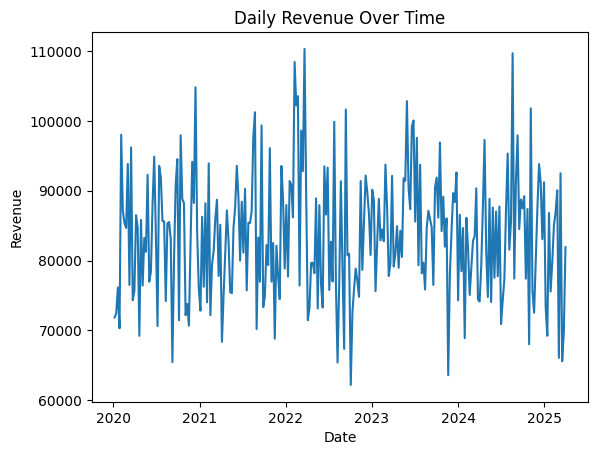

In [30]:
sns.lineplot(x='Date', y='Revenue', data=daily_sales)
plt.title('Daily Revenue Over Time')
plt.xticks
plt.show()

In [50]:
category_revenue= df.groupby('Category')['Revenue'].sum().sort_values(ascending = False)

In [52]:
category_revenue

Category
Vitamin        4300224.68
Mineral        4276107.99
Performance    2909702.18
Protein        2855492.09
Amino Acid     1464819.63
Omega          1451065.87
Fat Burner     1440900.05
Hydration      1411951.38
Herbal         1405700.79
Sleep Aid      1397315.79
Name: Revenue, dtype: float64

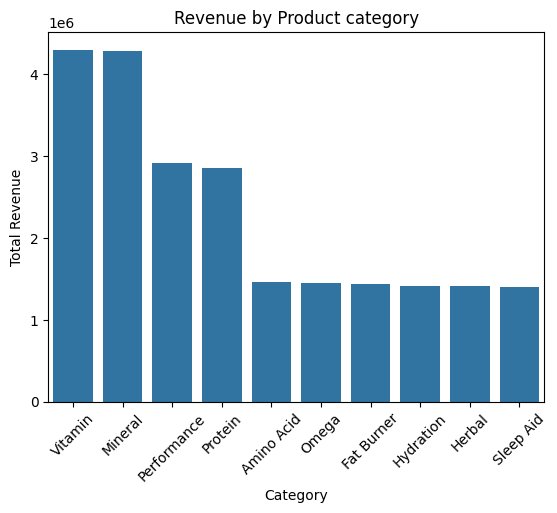

In [54]:
sns.barplot(x= category_revenue.index , y= category_revenue.values)
plt.title('Revenue by Product category')
plt.ylabel('Total Revenue')
plt.xticks(rotation = 45)
plt.show()

In [62]:
price_corr = df['Price'].corr(df['Units Sold'])
print(f"Correlation between Price and units Sold: {price_corr:.2f}")

Correlation between Price and units Sold: 0.01


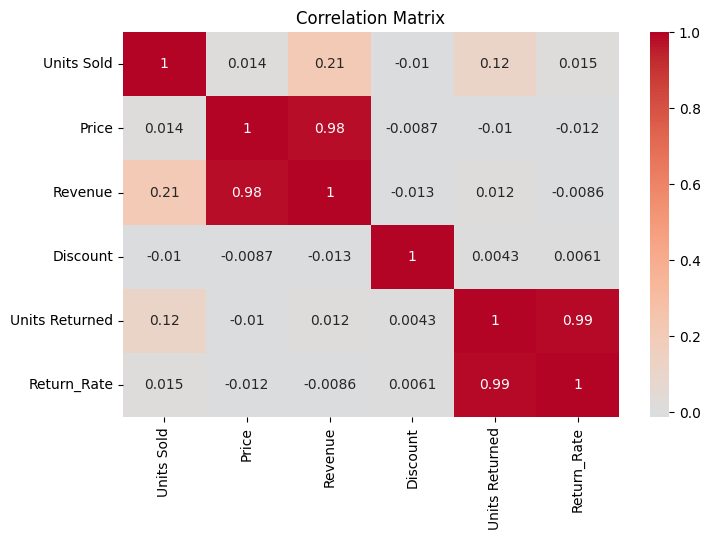

In [60]:
num_cols = ['Units Sold','Price', 'Revenue', 'Discount', 'Units Returned', 'Return_Rate']
plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols].corr(), annot =True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

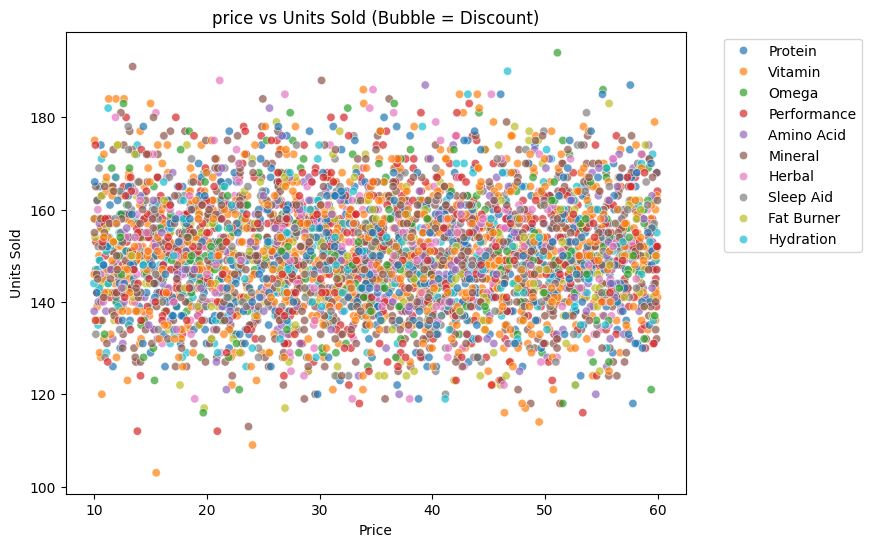

In [58]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Price',y='Units Sold', hue= 'Category', data=df, alpha=0.7)
plt.title('price vs Units Sold (Bubble = Discount)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

In [64]:
loc_platform = df.groupby(['Location','Platform'])['Revenue'].sum().unstack().fillna(0)
loc_platform

Platform      Amazon     Walmart       iHerb
Location                                    
Canada    2613844.28  2518639.07  2716096.38
UK        2442671.23  2637066.25  2624222.86
USA       2612936.27  2232862.30  2514941.81

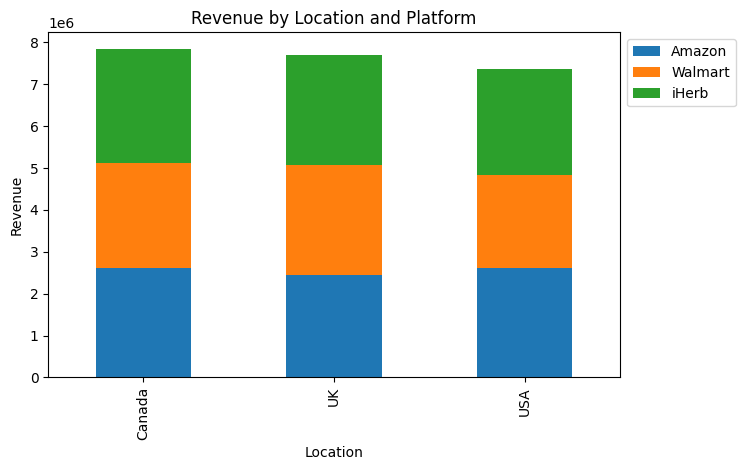

In [68]:
loc_platform.plot(kind = 'bar',stacked = True)
plt.title('Revenue by Location and Platform')
plt.ylabel('Revenue')
plt.xticks
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

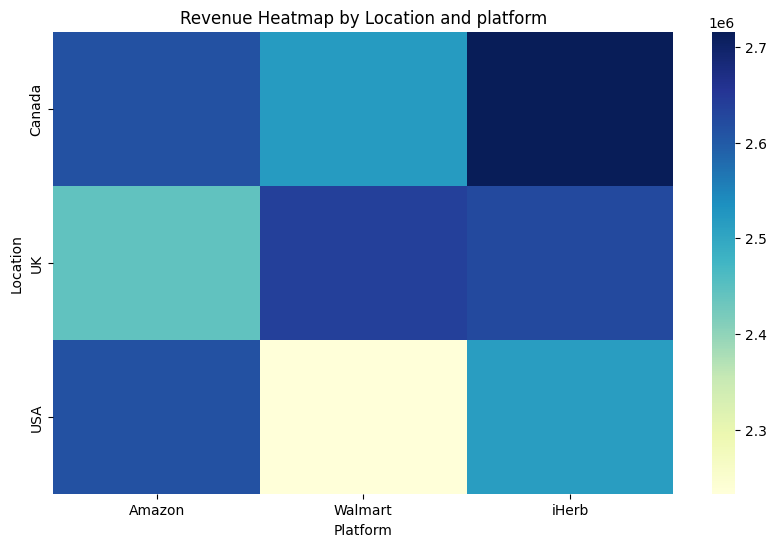

In [70]:
pivot = df.pivot_table(values='Revenue', index='Location', columns = 'Platform', aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(pivot,cmap='YlGnBu', annot = False)
plt.title('Revenue Heatmap by Location and platform')
plt.show()

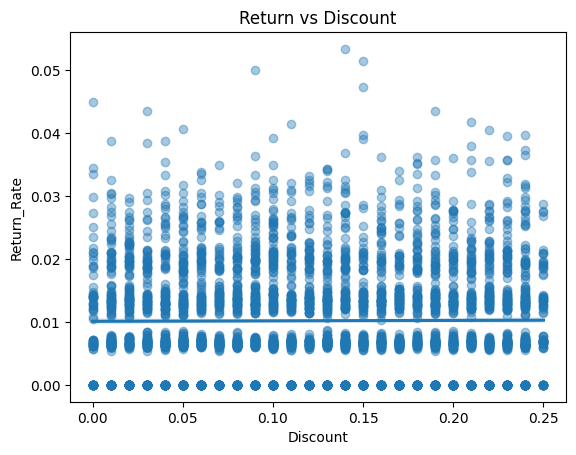

Correlation (Discount vs Return Rate): 0.01


In [74]:
sns.regplot(x='Discount', y = 'Return_Rate', data=df, scatter_kws={'alpha':0.4})
plt.title('Return vs Discount')
plt.show()
print(f'Correlation (Discount vs Return Rate): {df['Discount'].corr(df['Return_Rate']):.2f}')

C:\Users\user\AppData\Local\Temp\ipykernel_14372\519166714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=return_rate_cat.index, y=return_rate_cat.values, palette = 'magma')


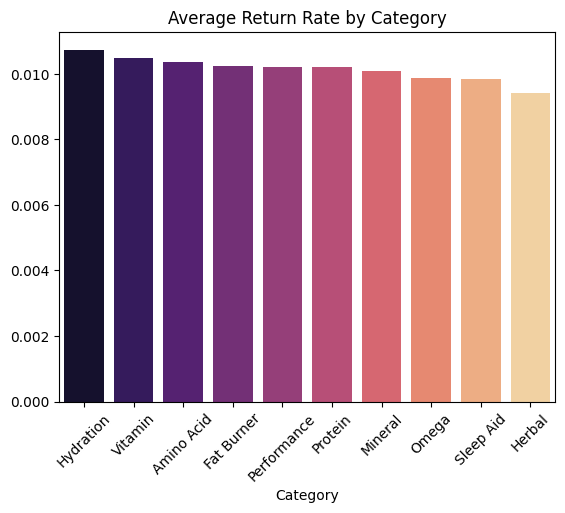

In [72]:
return_rate_cat = df.groupby('Category')['Return_Rate'].mean().sort_values(ascending=False)
sns.barplot(x=return_rate_cat.index, y=return_rate_cat.values, palette = 'magma')
plt.title('Average Return Rate by Category')
plt.xticks(rotation=45)
plt.show()

In [76]:
top_products =df.groupby('Product Name')['Revenue'].sum().sort_values(ascending = False)
top_products

Product Name
Biotin                1486798.62
Zinc                  1482546.95
Pre-Workout           1477183.78
BCAA                  1464819.63
Fish Oil              1451065.87
Green Tea Extract     1440900.05
Collagen Peptides     1433297.24
Creatine              1432518.40
Iron Supplement       1431582.41
Whey Protein          1422194.85
Vitamin C             1421998.07
Electrolyte Powder    1411951.38
Ashwagandha           1405700.79
Melatonin             1397315.79
Multivitamin          1391427.99
Magnesium             1361978.63
Name: Revenue, dtype: float64

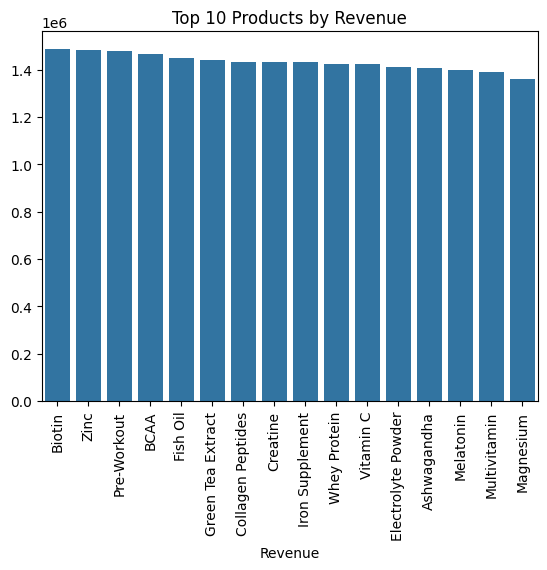

In [78]:
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Products by Revenue')
plt.xticks(rotation = 90)
plt.xlabel('Revenue')
plt.show()

In [82]:
category_return=df.groupby('Category')['Return_Rate'].mean().sort_values(ascending= False)
category_return

Category
Hydration      0.010746
Vitamin        0.010475
Amino Acid     0.010355
Fat Burner     0.010229
Performance    0.010207
Protein        0.010203
Mineral        0.010079
Omega          0.009870
Sleep Aid      0.009860
Herbal         0.009433
Name: Return_Rate, dtype: float64

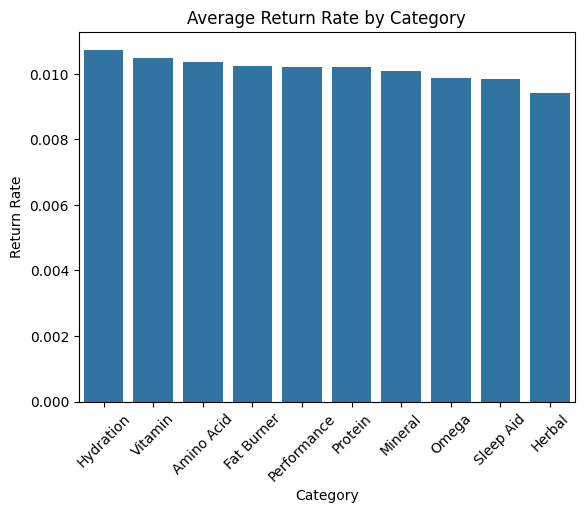

In [84]:
sns.barplot(x=category_return.index, y = category_return.values)
plt.title('Average Return Rate by Category')
plt.ylabel('Return Rate')
plt.xticks(rotation = 45)
plt.show()          

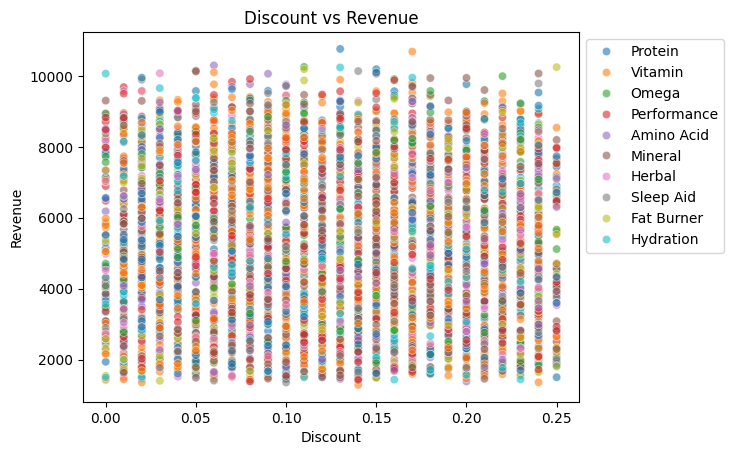

In [86]:
sns.scatterplot(data =df, x='Discount', y = 'Revenue',hue = 'Category', alpha= 0.6)
plt.title('Discount vs Revenue')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

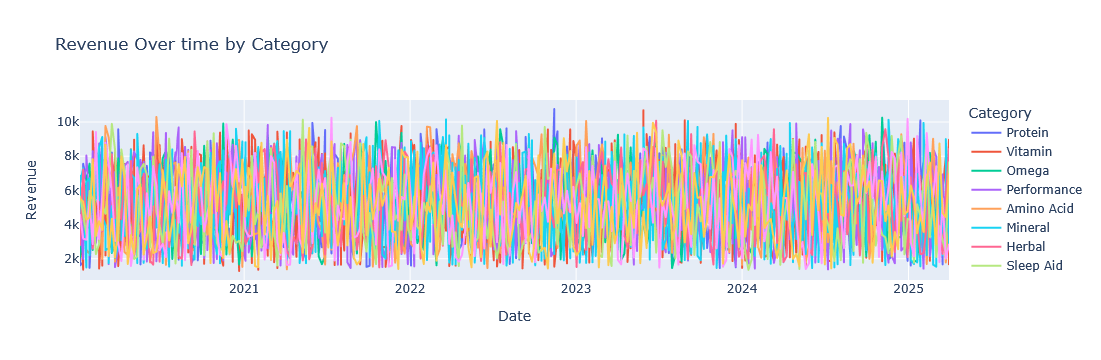

In [92]:
fig = px.line(df, x='Date', y='Revenue',color='Category',title='Revenue Over time by Category')
fig.show()

In [94]:
df['Monthly'] = df['Date'].dt.to_period("M")
monthly = df.groupby('Monthly').agg({
    "Revenue":"sum",
    "Units Sold": "sum",
    "Discount":"mean",
    "Units Returned" : "sum"
}).reset_index()    

In [96]:
monthly

Monthly    Revenue  Units Sold  Discount  Units Returned
0   2020-01  290723.89        9547  0.120313             101
1   2020-02  355213.26        9493  0.128125              91
2   2020-03  416547.17       12145  0.111375             123
3   2020-04  326287.92        9605  0.138281              91
4   2020-05  333210.99        9557  0.119375              90
..      ...        ...         ...       ...             ...
58  2024-11  329894.33        9838  0.117813             106
59  2024-12  446728.99       12042  0.127125              99
60  2025-01  304965.15        9617  0.125156              92
61  2025-02  341768.25        9542  0.128125             103
62  2025-03  375859.01       12049  0.124625             135

[63 rows x 5 columns]

In [98]:
monthly['Monthly'] = monthly['Monthly'].astype(str)

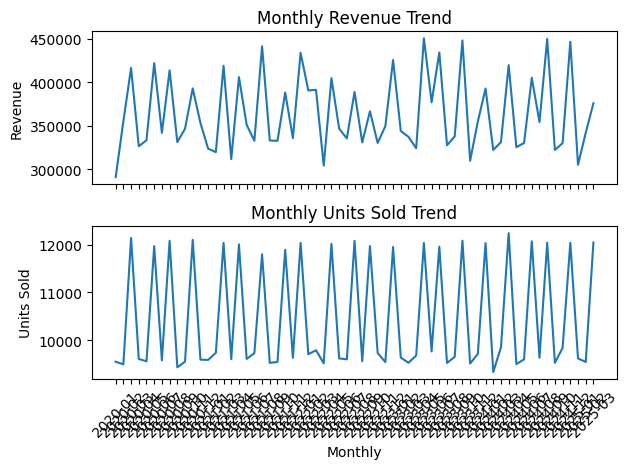

In [100]:
fig, axes = plt.subplots(2,1,sharex = True)
sns.lineplot(data = monthly, x='Monthly', y= 'Revenue', ax= axes[0])
axes[0].set_title('Monthly Revenue Trend')
axes[0].tick_params(axis='x',rotation =45)

sns.lineplot(data=monthly, x='Monthly', y= 'Units Sold', ax=axes[1])
axes[1].set_title('Monthly Units Sold Trend')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [102]:
df['Net Revenue']= df['Revenue']-(df['Units Returned']*df['Price'])

In [104]:
category_profit = df.groupby('Category')['Net Revenue'].sum().sort_values(ascending= False)

In [106]:
category_profit

Category
Vitamin        4255337.22
Mineral        4233108.50
Performance    2879997.43
Protein        2827040.48
Amino Acid     1449514.18
Omega          1436916.36
Fat Burner     1426130.43
Hydration      1396778.95
Herbal         1392349.37
Sleep Aid      1383401.64
Name: Net Revenue, dtype: float64

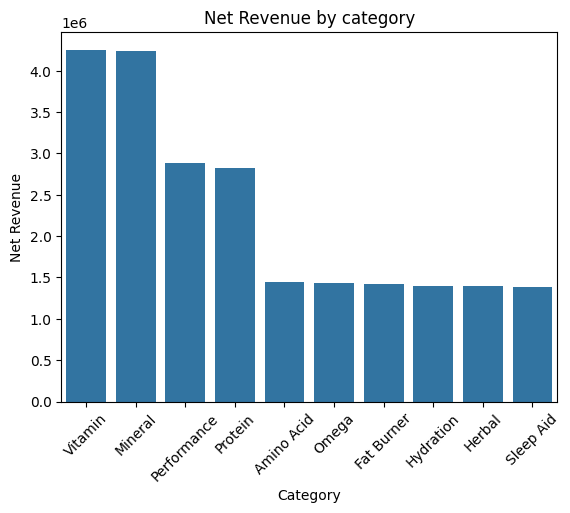

In [108]:
sns.barplot(x=category_profit.index, y = category_profit.values)
plt.title('Net Revenue by category')
plt.ylabel('Net Revenue')
plt.xticks(rotation = 45)
plt.show()